In [6]:
### Load Modules

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

### Prepare/collect data

In [3]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [8]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

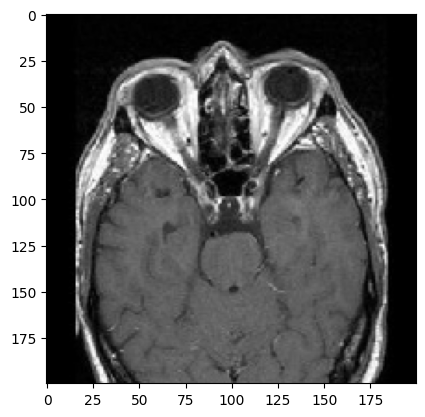

In [9]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [16]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
sv = SVC()
sv.fit(xtrain, ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Evaluation

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


### Prediction

In [22]:
pred = sv.predict(xtest)


In [23]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [24]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


### TEST MODEL

In [25]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

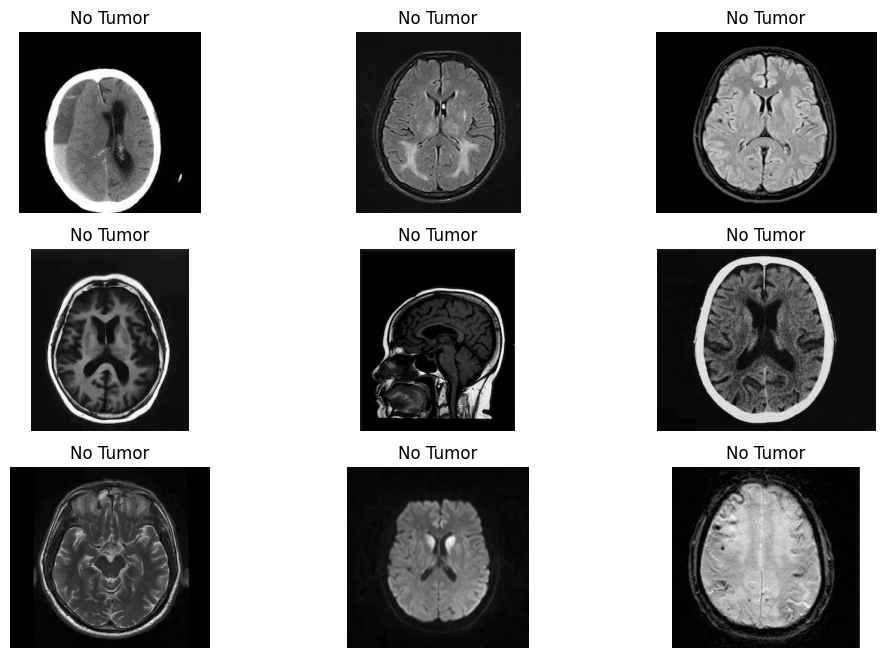

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

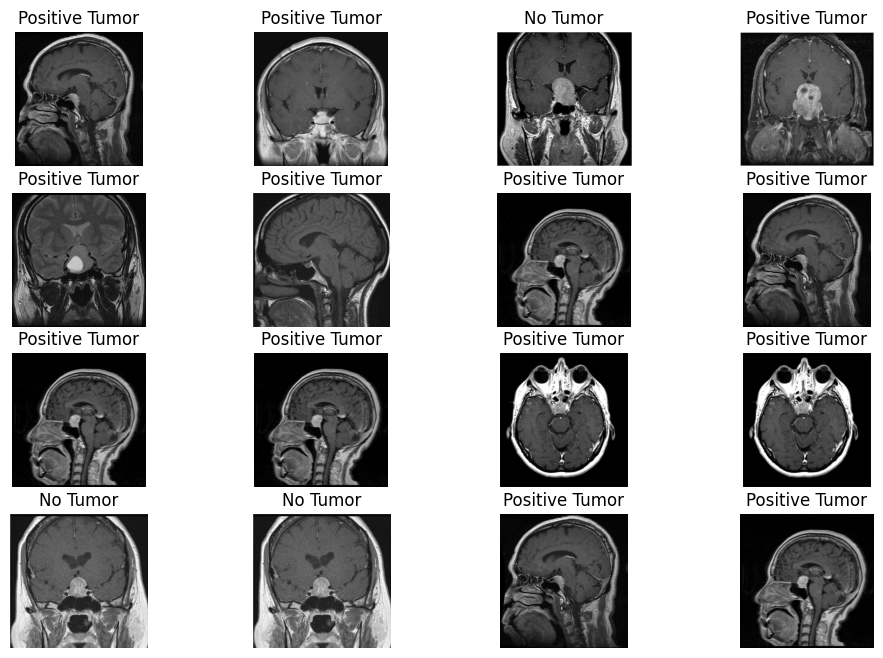

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

## Decision Tree Classification
Let's compare the performance using a Decision Tree Classifier

In [28]:
# Prepare data for Decision Tree
X_train_flattened = xtrain.reshape(xtrain.shape[0], -1)
X_test_flattened = xtest.reshape(xtest.shape[0], -1)

Decision Tree Performance:
Training Accuracy: 1.0
Testing Accuracy: 0.9714285714285714


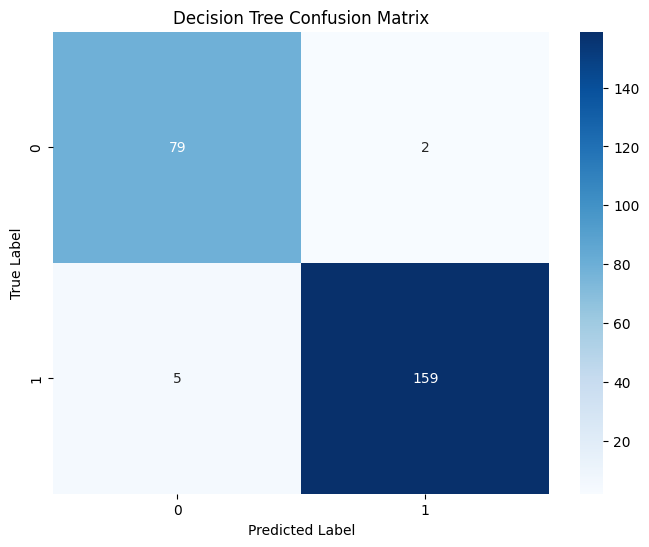


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        81
           1       0.99      0.97      0.98       164

    accuracy                           0.97       245
   macro avg       0.96      0.97      0.97       245
weighted avg       0.97      0.97      0.97       245



In [29]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create and train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_flattened, ytrain)

# Make predictions
dt_train_pred = dt_classifier.predict(X_train_flattened)
dt_test_pred = dt_classifier.predict(X_test_flattened)

# Print accuracy scores
print("Decision Tree Performance:")
print("Training Accuracy:", accuracy_score(ytrain, dt_train_pred))
print("Testing Accuracy:", accuracy_score(ytest, dt_test_pred))

# Create confusion matrix
dt_cm = confusion_matrix(ytest, dt_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(ytest, dt_test_pred))

Decision Tree Performance:
Training Accuracy: 1.0
Testing Accuracy: 0.9714285714285714


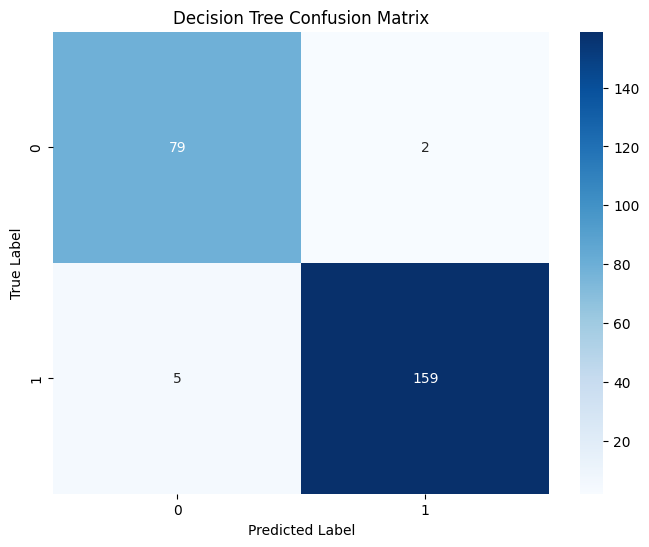


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        81
           1       0.99      0.97      0.98       164

    accuracy                           0.97       245
   macro avg       0.96      0.97      0.97       245
weighted avg       0.97      0.97      0.97       245



In [31]:

# Create and train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_flattened, ytrain)

# Make predictions
dt_train_pred = dt_classifier.predict(X_train_flattened)
dt_test_pred = dt_classifier.predict(X_test_flattened)

# Print accuracy scores
print("Decision Tree Performance:")
print("Training Accuracy:", accuracy_score(ytrain, dt_train_pred))
print("Testing Accuracy:", accuracy_score(ytest, dt_test_pred))

# Create confusion matrix
dt_cm = confusion_matrix(ytest, dt_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(ytest, dt_test_pred))


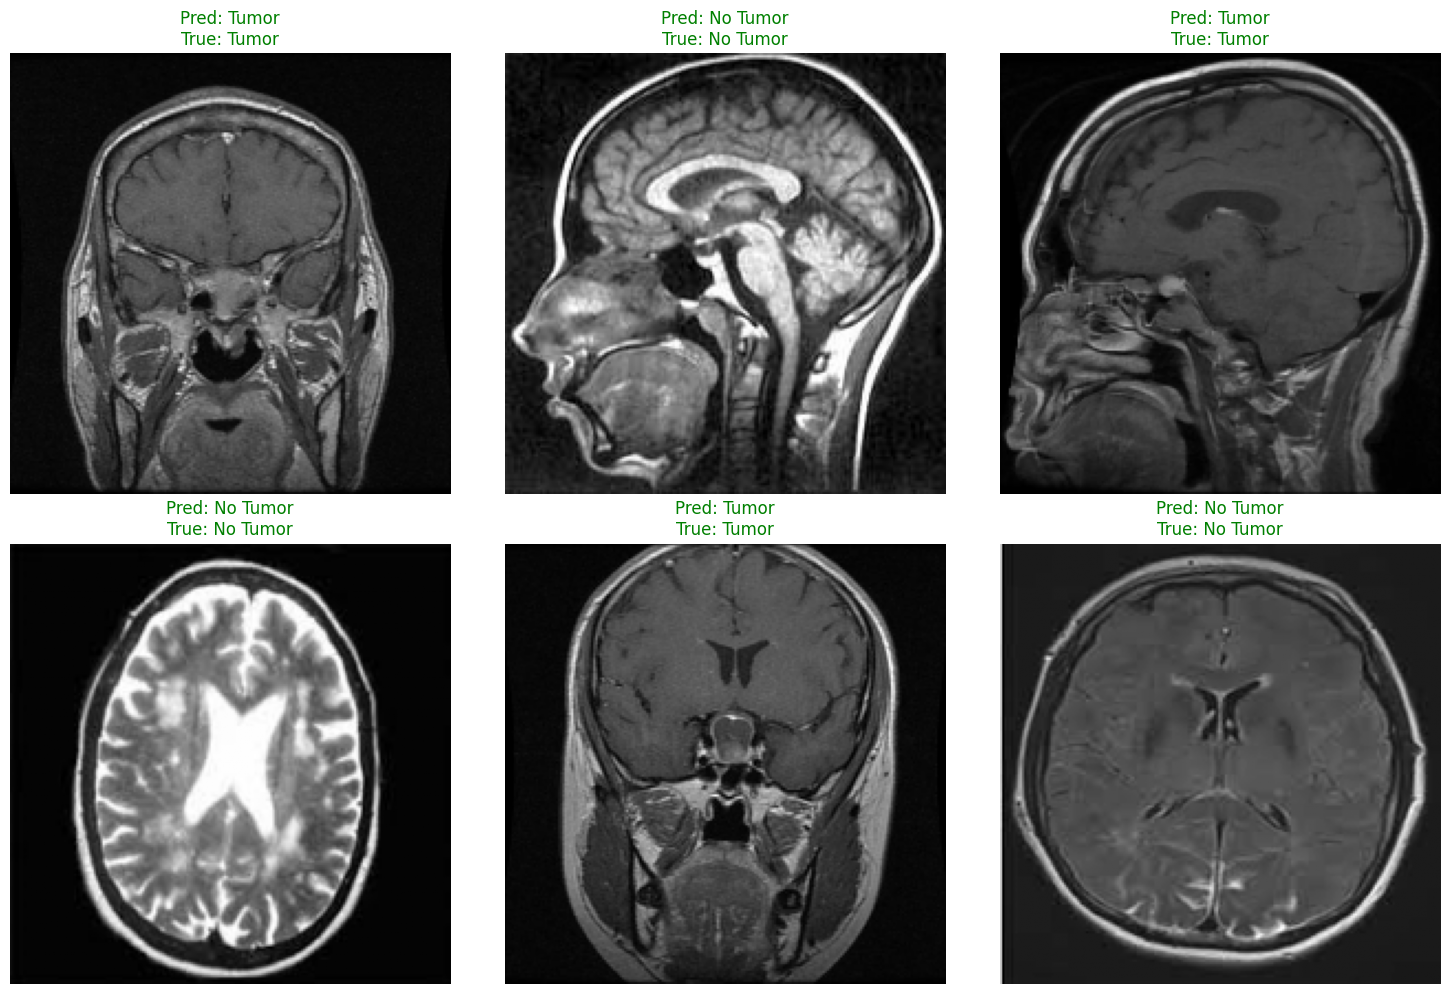

In [32]:
# Visualize some predictions from Decision Tree
plt.figure(figsize=(15, 10))

# Get some example predictions
n_samples = 6
sample_indices = np.random.choice(len(X_test_flattened), n_samples, replace=False)

for idx, i in enumerate(sample_indices):
    plt.subplot(2, 3, idx + 1)
    img = X_test_flattened[i].reshape(200, 200)
    plt.imshow(img, cmap='gray')
    pred = dt_classifier.predict([X_test_flattened[i]])[0]
    true = ytest[i]
    plt.title(f'Pred: {"Tumor" if pred == 1 else "No Tumor"}\nTrue: {"Tumor" if true == 1 else "No Tumor"}',
              color='green' if pred == true else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Final Tumor Detection Result
Let's create a clear final output that tells whether a tumor is present or not

In [ ]:
def predict_tumor(image_path):
    # Read and preprocess the image
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (200, 200))
    img_flattened = img.reshape(1, -1) / 255.0
    
    # Get predictions from all models
    lg_pred = lg.predict_proba(img_flattened)[0]
    svm_pred = sv.predict(img_flattened)[0]
    dt_pred = dt_classifier.predict_proba(img_flattened)[0]
    
    # Calculate average confidence
    tumor_confidence = (lg_pred[1] + dt_pred[1]) / 2 * 100  # SVM doesn't provide probabilities
    
    # Make final decision (using majority voting)
    predictions = [
        1 if lg_pred[1] > 0.5 else 0,
        svm_pred,
        1 if dt_pred[1] > 0.5 else 0
    ]
    final_prediction = 1 if sum(predictions) >= 2 else 0
    
    # Display result with image
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    result = "TUMOR DETECTED" if final_prediction == 1 else "NO TUMOR DETECTED"
    confidence = tumor_confidence if final_prediction == 1 else (100 - tumor_confidence)
    
    plt.title(f"RESULT: {result}\nConfidence: {confidence:.2f}%", 
              color='red' if final_prediction == 1 else 'green',
              pad=20, fontsize=14, fontweight='bold')
    plt.show()
    
    print("-" * 50)
    print(f"Final Result: {result}")
    print(f"Confidence Level: {confidence:.2f}%")
    print("-" * 50)

Testing with a No Tumor case:


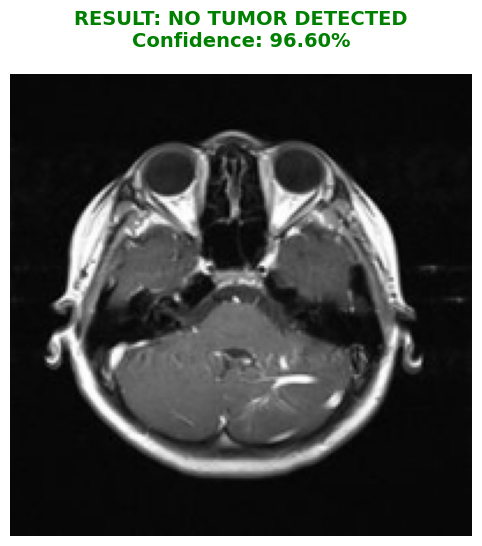

--------------------------------------------------
Final Result: NO TUMOR DETECTED
Confidence Level: 96.60%
--------------------------------------------------

Testing with a Tumor case:


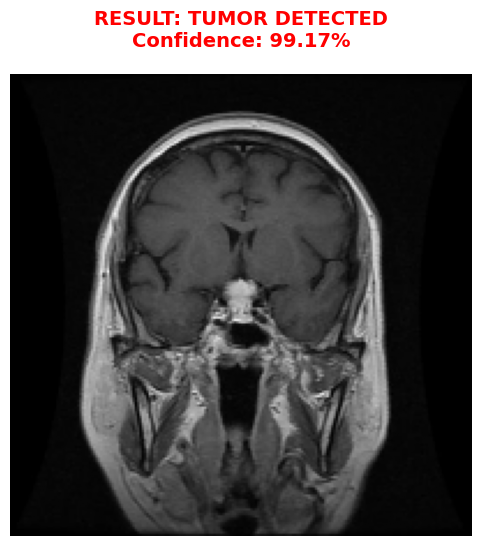

--------------------------------------------------
Final Result: TUMOR DETECTED
Confidence Level: 99.17%
--------------------------------------------------


In [ ]:
# Test with some example images
print("Testing with a No Tumor case:")
predict_tumor('brain_tumor/Testing/no_tumor/image.jpg')

print("\nTesting with a Tumor case:")
predict_tumor('brain_tumor/Testing/pituitary_tumor/image.jpg')